Write a program to solve the diffusion problem


In [121]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1
Solve the diffusion problem \
$\frac{\partial{u}}{\partial{t}}  = \frac{\partial^2{u}}{\partial{x}^2}$\
we get explicit equation: \
$T(x, t + k) = \lambda T(x - h, t) + (1-2 \lambda)T(x,t) + \lambda T(x+ h, t)$\
T is the solution matrix (number of rows = length of position vector, x, and number of columns = length of time\
where $\lambda = \frac{k}{h^2}$

In [122]:
h= 0.1 # delta of x 
k = 0.01 # delta of t
x = np.arange(0,1 + h,h).round(3) # x array
t = np.arange(0,0.4 + k,k).round(3) # time array 
boundary_conditions= [100,100]
initial_conditions = 0
  

n = len(x)
m = len(t)
T = np.zeros((m,n))

T[0,:] = boundary_conditions[0]
T[-1, :] = boundary_conditions[1]
T[:, 0] = initial_conditions
factor = k /h **2

for i in range(1, m):
    # forward explicit 
    T[i, 1:-1] = T[i-1, 1:-1] + factor * (T[i-1, :-2] - 2 * T[i-1, 1:-1] + T[i-1, 2:])

T
    

array([[ 0.00000000e+00,  1.00000000e+02,  1.00000000e+02,
         1.00000000e+02,  1.00000000e+02,  1.00000000e+02,
         1.00000000e+02,  1.00000000e+02,  1.00000000e+02,
         1.00000000e+02,  1.00000000e+02],
       [ 0.00000000e+00,  2.84217094e-14,  1.00000000e+02,
         1.00000000e+02,  1.00000000e+02,  1.00000000e+02,
         1.00000000e+02,  1.00000000e+02,  1.00000000e+02,
         1.00000000e+02,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+02,  5.68434189e-14,
         1.00000000e+02,  1.00000000e+02,  1.00000000e+02,
         1.00000000e+02,  1.00000000e+02,  1.00000000e+02,
         2.84217094e-14,  0.00000000e+00],
       [ 0.00000000e+00, -1.00000000e+02,  2.00000000e+02,
         8.52651283e-14,  1.00000000e+02,  1.00000000e+02,
         1.00000000e+02,  1.00000000e+02,  5.68434189e-14,
         1.00000000e+02,  0.00000000e+00],
       [ 0.00000000e+00,  3.00000000e+02, -3.00000000e+02,
         3.00000000e+02,  1.13686838e-13,  1.00000000e+02,
  

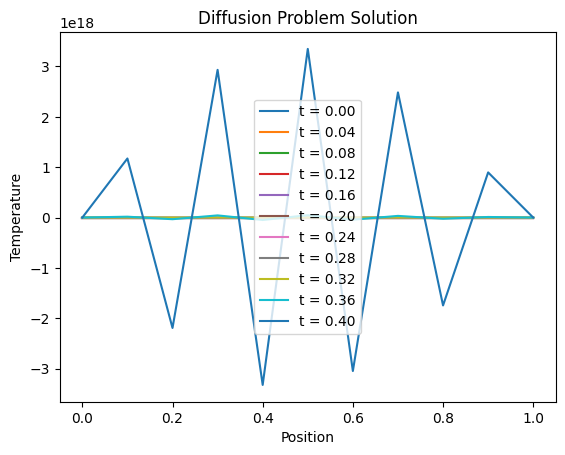

In [123]:
# Plot the results
for time_idx in range(0, m, int(m / 10)):
    plt.plot(x, T[time_idx, :], label=f't = {t[time_idx]:.2f}')

plt.xlabel('Position')
plt.ylabel('Temperature')
plt.title('Diffusion Problem Solution')
plt.legend()
plt.show()

In [124]:
# input: x spacing, t spacing
# output: 
def solve_diffusion(Nx, Nt, dx, dt, t_max):
    x = np.linspace(0, 1, Nx)
    T = np.zeros((Nt, Nx))
    
    # Boundary conditions
    T[:, 0] = 100
    T[:, -1] = 100
    
    factor = dt / dx ** 2
    
    for i in range(1, Nt):
        T[i, 1:-1] = T[i-1, 1:-1] + factor * (T[i-1, :-2] - 2 * T[i-1, 1:-1] + T[i-1, 2:])
    
    return x, T

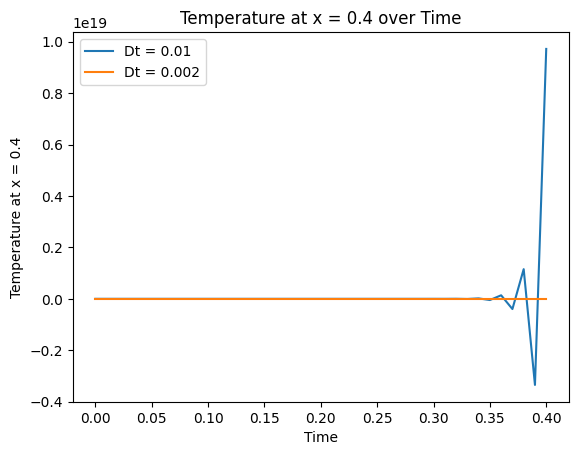

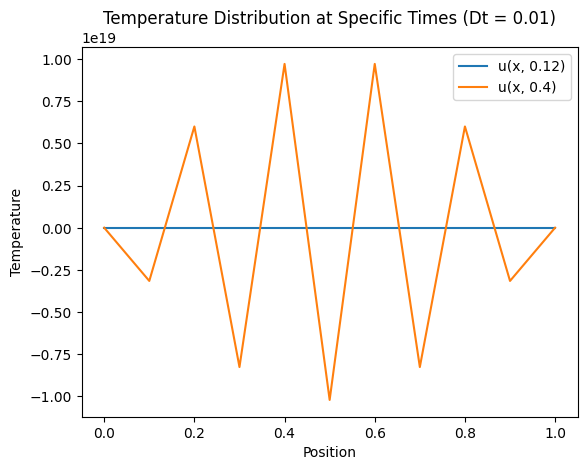

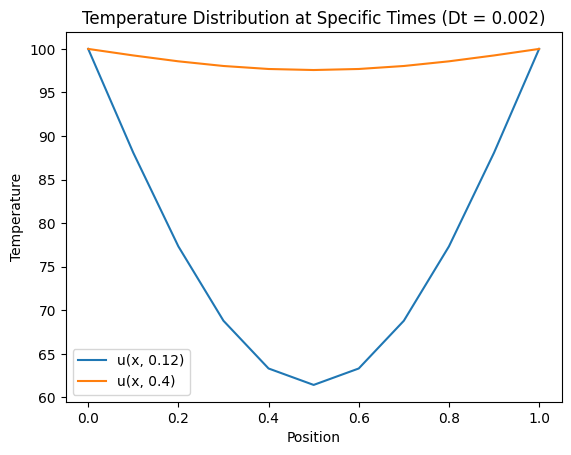

In [125]:
# Parameters
L = 1.0
dx = 0.1
Nx = int(L / dx) + 1
t_max = 0.4

# Time step parameters
dt_1 = 0.01
dt_2 = 0.002
Nt_1 = int(t_max / dt_1) + 1
Nt_2 = int(t_max / dt_2) + 1

# Solve for different time steps
x, T_1 = solve_diffusion(Nx, Nt_1, dx, dt_1, t_max)
x, T_2 = solve_diffusion(Nx, Nt_2, dx, dt_2, t_max)

# Plot the results for u(0.4, t)
plt.figure()
plt.plot(np.linspace(0, t_max, Nt_1), T_1[:, int(0.4 / dx)], label=f'Dt = {dt_1}')
plt.plot(np.linspace(0, t_max, Nt_2), T_2[:, int(0.4 / dx)], label=f'Dt = {dt_2}')
plt.xlabel('Time')
plt.ylabel('Temperature at x = 0.4')
plt.title('Temperature at x = 0.4 over Time')
plt.legend()
plt.show()

# Plot the results for u(x, 0.12) and u(x, 0.4)
plt.figure()
plt.plot(x, T_1[int(0.12 / dt_1)], label='u(x, 0.12)')
plt.plot(x, T_1[int(0.4 / dt_1)], label='u(x, 0.4)')
plt.xlabel('Position')
plt.ylabel('Temperature')
plt.title('Temperature Distribution at Specific Times (Dt = 0.01)')
plt.legend()
plt.show()

plt.figure()
plt.plot(x, T_2[int(0.12 / dt_2)], label='u(x, 0.12)')
plt.plot(x, T_2[int(0.4 / dt_2)], label='u(x, 0.4)')
plt.xlabel('Position')
plt.ylabel('Temperature')
plt.title('Temperature Distribution at Specific Times (Dt = 0.002)')
plt.legend()
plt.show()

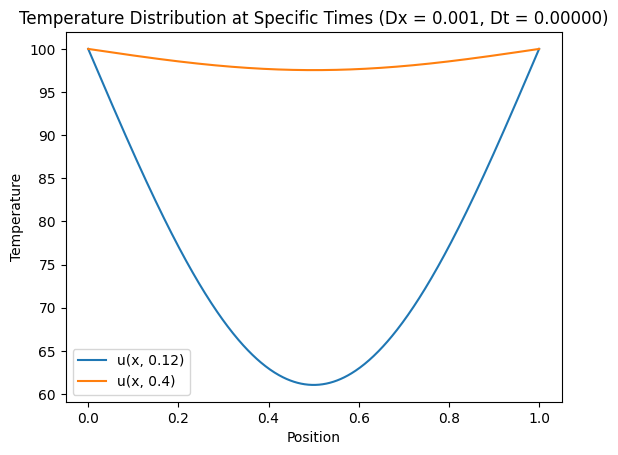

In [130]:
# Repeat solution with dx = 0.001
dx_new = 0.001
Nx_new = int(L / dx_new) + 1
dt_new = 0.5 * dx_new ** 2  # Stability criterion
Nt_new = int(t_max / dt_new) + 1

x_new, T_new = solve_diffusion(Nx_new, Nt_new, dx_new, dt_new, t_max)

plt.figure()
plt.plot(x_new, T_new[int(0.12 / dt_new)], label=f'u(x, 0.12)')
plt.plot(x_new, T_new[int(0.4 / dt_new)], label=f'u(x, 0.4)')
plt.xlabel('Position')
plt.ylabel('Temperature')
plt.title(f'Temperature Distribution at Specific Times (Dx = {dx_new}, Dt = {dt_new:.5f})')
plt.legend()
plt.show()